In [2]:
import json

with open("gfp-ecoliheg.json") as f:
    results = json.load(f)
results

{'1': [{'1': {'A': 0.3458856345885635,
    'T': 0.2691771269177127,
    'G': 0.19386331938633194,
    'C': 0.1910739191073919}},
  {'1': {'A': 0.24778707477586917,
    'T': 0.22260949202060226,
    'G': 0.27406970099491756,
    'C': 0.25553373220861103}},
  {'1': {'A': 0.2482566248256625,
    'T': 0.22315202231520223,
    'G': 0.2733612273361227,
    'C': 0.25523012552301255}}],
 '2': [{'2': {'AA': 0.12150837988826815,
    'AT': 0.08100558659217877,
    'AG': 0.06005586592178771,
    'AC': 0.0824022346368715,
    'TA': 0.05726256983240224,
    'TT': 0.09217877094972067,
    'TG': 0.07681564245810056,
    'TC': 0.04329608938547486,
    'GA': 0.07960893854748603,
    'GT': 0.0446927374301676,
    'GG': 0.0446927374301676,
    'GC': 0.025139664804469275,
    'CA': 0.08659217877094973,
    'CT': 0.051675977653631286,
    'CG': 0.012569832402234637,
    'CC': 0.040502793296089384}},
  {'2': {'AA': 0.08418121898556763,
    'AT': 0.05179741656880942,
    'AG': 0.04839198454486912,
    'AC': 0

In [25]:
import statistics
for i in results.keys():
    print(i)
    insert_freqs = results[str(i)][0][str(i)]
    target_freqs = results[str(i)][1][str(i)]
    result_freqs = results[str(i)][2][str(i)]
    abs_change = []
    rel_change = []
    abs_error = []
    rel_error = []
    for key in insert_freqs.keys():
        abs_change.append(abs(insert_freqs[key] - result_freqs[key]))
        try:
            rel_change.append(abs(insert_freqs[key] - result_freqs[key]) / insert_freqs[key])
        except ZeroDivisionError:
            pass
        abs_error.append(abs(target_freqs[key] - result_freqs[key]))
        
        try:
            rel_error.append(abs(target_freqs[key] - result_freqs[key]) / target_freqs[key])
        except ZeroDivisionError:
            pass
    print("Avg Abs change", statistics.mean(abs_change))
    print("Avg Rel change", statistics.mean(rel_change))
    print("Avg Abs error", statistics.mean(abs_error))
    print("Avg Rel error", statistics.mean(rel_error))

1
Avg Abs change 0.07182705718270571
Avg Rel change 0.2997702215695964
Avg Abs error 0.000506040172196652
Avg Rel error 0.002026313339148993
2
Avg Abs change 0.023743016759776536
Avg Rel change 0.711557316083257
Avg Abs error 0.002218111888866623
Avg Rel error 0.03786366768653022
3
Avg Abs change 0.008653846153846154
Avg Rel change 1.1192648087339527
Avg Abs error 0.0016140122082310701
Avg Rel error 0.1081930085964246
4
Avg Abs change 0.002702643557422969
Avg Rel change 0.7758572926025756
Avg Abs error 0.0011090379700634638
Avg Rel error 0.3568182272291528
5
Avg Abs change 0.001016282433380084
Avg Rel change 0.5900226757369614
Avg Abs error 0.0006771850700457461
Avg Rel error 0.9824261738406124


In [72]:
with open("gfp-ecoliheg-ed.json") as f:
    results_ed = json.load(f)

generating rectangles!
fixing axes!
plotting!


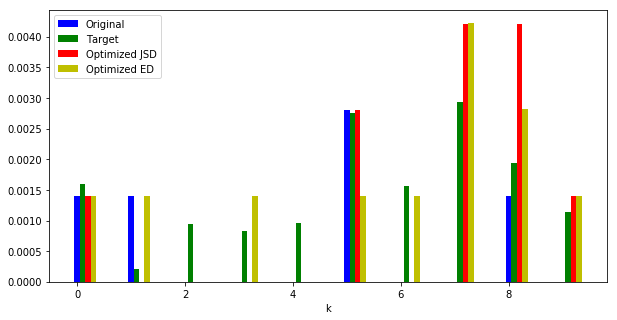

In [81]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

k = 5

insert_freqs = results[str(k)][0][str(k)]
target_freqs = results[str(k)][1][str(k)]
result_freqs = results[str(k)][2][str(k)]
result_freqs_ed = results_ed[str(k)]["result_freqs"][str(k)]

print("generating rectangles!")
N = len(result_freqs)
ind = np.arange(N)  # the x locations for the groups

idx = [np.random.randint(N) for i in range(10)] # choose some random indices
insert_freqs = [[insert_freqs[key] for key in sorted(insert_freqs.keys())][i] for i in idx]
target_freqs = [[target_freqs[key] for key in sorted(target_freqs.keys())][i] for i in idx]
result_freqs = [[result_freqs[key] for key in sorted(result_freqs.keys())][i] for i in idx]
result_freqs_ed = [[result_freqs_ed[key] for key in sorted(result_freqs_ed.keys())][i] for i in idx]


width = 0.1       # the width of the bars
fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(np.arange(len(idx)), insert_freqs, width, color='b')
rects2 = ax.bar(np.arange(len(idx)) + width, target_freqs, width, color='g')
rects3 = ax.bar(np.arange(len(idx)) + 2*width, result_freqs, width, color='r')
rects4 = ax.bar(np.arange(len(idx)) + 3*width, result_freqs_ed, width, color='y')

print("fixing axes!")
# add some text for labels, title and axes ticks
# ax.set_xticks(np.arange(len(idx)) + 2*width / 2)
# ax.set_xticklabels([f"{i}" for i in range(len(target_freqs))])
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Original', 'Target', "Optimized JSD", "Optimized ED"))
ax.set_xlabel("k")

print("plotting!")
plt.show()

In [91]:
for i in results.keys():
    print(i)
    insert_freqs = results[str(i)][0][str(i)]
    target_freqs = results[str(i)][1][str(i)]
    result_freqs_jsd = results[str(i)][2][str(i)]
    result_freqs_ed = results_ed[str(i)]["result_freqs"][str(i)]

    abs_change_jsd, abs_change_ed = [], []
    rel_change_jsd, rel_change_ed = [], []
    abs_error_jsd, abs_error_ed = [], []
    rel_error_jsd, rel_error_ed = [], []
    
    for key in insert_freqs.keys():
        abs_change_jsd.append(abs(insert_freqs[key] - result_freqs_jsd[key]))
        abs_change_ed.append(abs(insert_freqs[key] - result_freqs_ed[key]))
        
        try:
            rel_change_jsd.append(abs(insert_freqs[key] - result_freqs_jsd[key]) / insert_freqs[key])
        except ZeroDivisionError:
            pass
        
        
        try:
            rel_change_ed.append(abs(insert_freqs[key] - result_freqs_ed[key]) / insert_freqs[key])
        except ZeroDivisionError:
            pass
        
        
        abs_error_jsd.append(abs(target_freqs[key] - result_freqs_jsd[key]))
        abs_error_ed.append(abs(target_freqs[key] - result_freqs_ed[key]))
        
        try:
            rel_error_jsd.append(abs(target_freqs[key] - result_freqs_jsd[key]) / target_freqs[key])
        except ZeroDivisionError:
            pass
        try:
            rel_error_ed.append(abs(target_freqs[key] - result_freqs_ed[key]) / target_freqs[key])
        except ZeroDivisionError:
            pass
        
#     print("Metric", "JSD", "ED", sep="\t")
    print("Avg Abs change", statistics.mean(abs_change_jsd), statistics.mean(abs_change_ed), sep="\t")
    print("Avg Rel change", statistics.mean(rel_change_jsd), statistics.mean(rel_change_ed), sep="\t")
    print("Avg Abs error", statistics.mean(abs_error_jsd), statistics.mean(abs_error_ed), sep="\t")
    print("Avg Rel error", statistics.mean(rel_error_jsd), statistics.mean(rel_error_ed), sep="\t")

1
Avg Abs change	0.07182705718270571	0.07223726310607925
Avg Rel change	0.2997702215695964	0.3015103549573741
Avg Abs error	0.000506040172196652	0.00031588571214866135
Avg Rel error	0.002026313339148993	0.001222003382633557
2
Avg Abs change	0.023743016759776536	0.02402141592296301
Avg Rel change	0.711557316083257	0.7180629088532386
Avg Abs error	0.002218111888866623	0.0020481831120404024
Avg Rel error	0.03786366768653022	0.03580014356253766
3
Avg Abs change	0.008653846153846154	0.008722720397579948
Avg Rel change	1.1192648087339527	1.1342926751569935
Avg Abs error	0.0016140122082310701	0.0016996196572210834
Avg Rel error	0.1081930085964246	0.13634934071604546
4
Avg Abs change	0.002702643557422969	0.0028561530097270973
Avg Rel change	0.7758572926025756	0.8439048554166777
Avg Abs error	0.0011090379700634638	0.0010865245834829832
Avg Rel error	0.3568182272291528	0.4953041206012018
5
Avg Abs change	0.001016282433380084	0.0010147430207119294
Avg Rel change	0.5900226757369614	0.5741116008218